## Bildklassifizierung

Bilder klassifizieren anhand von einem Label
- Apfel oder Birne
- Hund oder Katze

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

image_dataset_from_directory:

Lädt ein Datenset aus einem Ordner

Klassifiziert automatisch nach den Unterordnern

Images werden automatisch auf eine gemeinsame Größe herunterskaliert

Lädt das Datenset in Batches

In [2]:
data = tf.keras.utils.image_dataset_from_directory("Data/Images")

Found 170 files belonging to 2 classes.


In [3]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Batch Datenset

Ein Batch Datenset teilt die Unterdatensets in Batches auf

Ein Batch ist ein 32 Elemente großer Block mit Daten

Die restlichen Daten die nicht mehr hinein passen, kommen in einen eigenen Block

In [4]:
iterator = data.as_numpy_iterator()

In [5]:
iterator

In [6]:
batch = iterator.next()

In [7]:
batch  # Hier kommen 2 Listen heraus: Die Images (4D Array), die Klassen (0 oder 1)

(array([[[[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [8]:
batch[0]

array([[[[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [

In [9]:
batch[1]

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

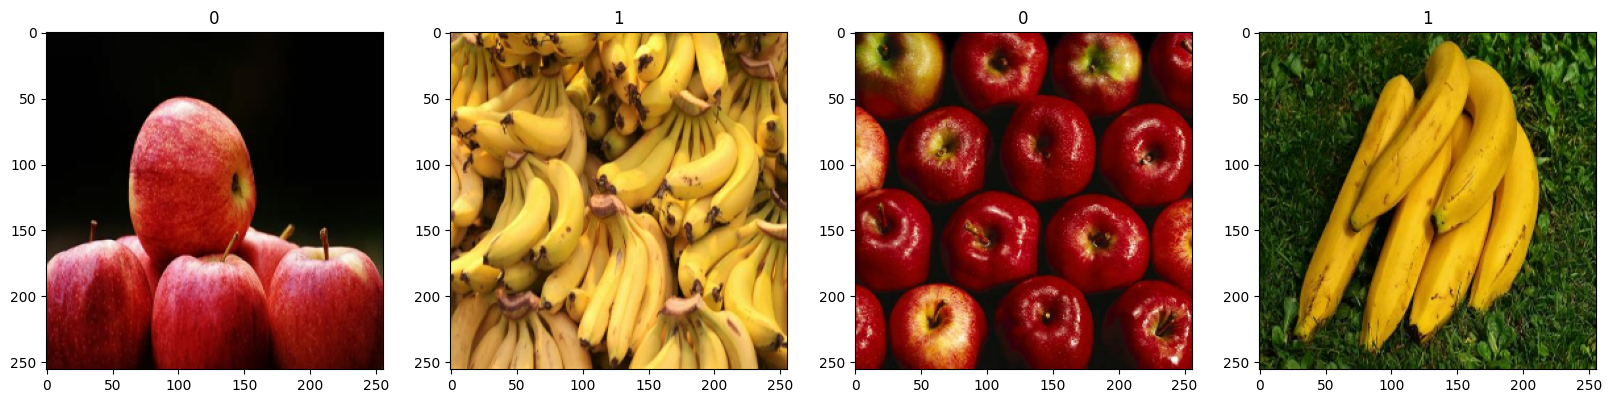

In [10]:
figure, axis = plt.subplots(ncols=4, figsize=(20, 5))
for index, image in enumerate(batch[0][:4]):  # enumerate: Fügt zu einer for Schleife einen Index hinzu
    axis[index].imshow(image.astype(int))
    axis[index].title.set_text(batch[1][index])

## Werte normalisieren

Farben sind momentan floats zwischen 0 und 255

Für Machine Learning ist das unpraktisch (sehr große Zahlen dauern länger zum verarbeiten)

Die Farben können durch 255 dividiert werden

In [11]:
data = data.map(lambda x, y: (x / 255, y))  # y nicht skalieren, da y die Labels sind (0 oder 1)

In [12]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
data.as_numpy_iterator().next()[0]

array([[[[5.83695956e-02, 1.44644111e-01, 1.52623793e-03],
         [6.65578768e-02, 1.52832389e-01, 2.59040389e-03],
         [3.23044732e-02, 1.10735841e-01, 0.00000000e+00],
         ...,
         [1.96655273e-01, 2.79008210e-01, 4.76356670e-02],
         [1.59215823e-01, 2.41568774e-01, 2.19609272e-02],
         [1.57536760e-01, 2.36305147e-01, 3.46200988e-02]],

        [[3.74984443e-02, 1.25795007e-01, 0.00000000e+00],
         [5.64831309e-02, 1.42757639e-01, 0.00000000e+00],
         [2.82093715e-02, 1.06640741e-01, 0.00000000e+00],
         ...,
         [1.98949844e-01, 2.84335852e-01, 4.99302298e-02],
         [1.29579678e-01, 2.14965701e-01, 2.10331939e-03],
         [1.53584555e-01, 2.38970593e-01, 2.03737747e-02]],

        [[3.30751911e-02, 1.27192840e-01, 4.83793393e-03],
         [4.04027589e-02, 1.26677275e-01, 0.00000000e+00],
         [4.18615006e-02, 1.20292872e-01, 0.00000000e+00],
         ...,
         [2.10389137e-01, 3.04506779e-01, 6.13695346e-02],
         [

In [14]:
len(data)  # Anzahl der Batches (170/32 -> aufrunden)

6

In [15]:
training = data.take(4)
valid = data.take(2)

## Model bauen

Ein Imageklassifizierungsmodell benötigt zusätzliche Layer

- Conv2D (Convolution Layer): Verwendet einen quadratischen Scanner (2x2, 3x3, 4x4, ...) und scannt das Image. Dieser Scanner bildet dann bei jeder Pixelgruppe einen Durchschnitt, und gibt diesen an den nächsten Layer weiter. Im nächsten werden diese neuen Pixel dann wieder in einem Image angeordnet (mithilfe des nächsten Layers)
- MaxPooling2D: Konvertiert die Durchschnittspixel zu einem Image
- Flatten: Konvertiert das Image (2D-Array) zu einem 1D-Array

Overfitting: Modell wird zu sehr auf die Trainingsdaten angepasst, und kann dadurch nicht mehr korrekt Inputdaten verarbeiten. Kann durch Dropout Layer oder geringere Lernrate vermieden werden.

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation="relu", input_shape=(256, 256, 3)),  # 4 Neuronen, 3x3 Scanner, Shape: 256x256 mit Farbtiefe 3
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(4, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics=["accuracy"], loss="binary_crossentropy")

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 4)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 127, 127, 4)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 4)       148       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 4)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 62, 62, 4)        

In [60]:
result = model.fit(training, epochs=10, verbose=1, validation_data=valid)

Epoch 1/10
4/4 [==============================] - 3s 560ms/step - loss: 1.5477 - accuracy: 0.5000 - val_loss: 0.6674 - val_accuracy: 0.5781
Epoch 2/10
4/4 [==============================] - 2s 530ms/step - loss: 0.7396 - accuracy: 0.5078 - val_loss: 0.7080 - val_accuracy: 0.4062
Epoch 3/10
4/4 [==============================] - 2s 540ms/step - loss: 0.6547 - accuracy: 0.5938 - val_loss: 0.6293 - val_accuracy: 0.6719
Epoch 4/10
4/4 [==============================] - 2s 549ms/step - loss: 0.6229 - accuracy: 0.6641 - val_loss: 0.6078 - val_accuracy: 0.5469
Epoch 5/10
4/4 [==============================] - 3s 804ms/step - loss: 0.5809 - accuracy: 0.5781 - val_loss: 0.5563 - val_accuracy: 0.6094
Epoch 6/10
4/4 [==============================] - 3s 826ms/step - loss: 0.5181 - accuracy: 0.7344 - val_loss: 0.5086 - val_accuracy: 0.8281
Epoch 7/10
4/4 [==============================] - 3s 801ms/step - loss: 0.4455 - accuracy: 0.8906 - val_loss: 0.4655 - val_accuracy: 0.6875
Epoch 8/10
4/4 [====

In [61]:
import cv2

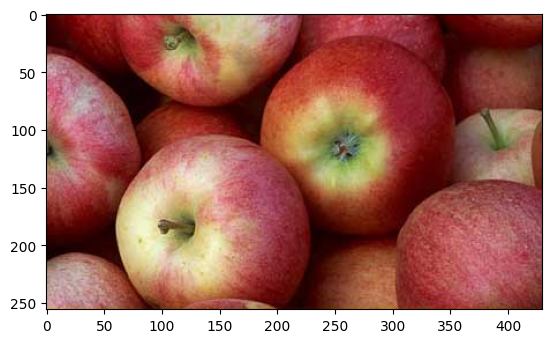

In [82]:
img = cv2.imread("Data/apple2.png", cv2.COLOR_BGR2RGB)
plt.imshow(np.flip(img, axis=-1))
plt.show()

Image skalieren damit es zum Modell passt

In [83]:
resize = tf.image.resize(img, (256, 256))

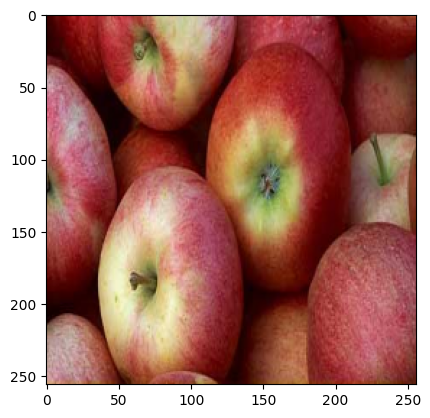

In [84]:
plt.imshow(np.flip(resize.numpy().astype(int), axis=-1))
plt.show()

In [85]:
# resize

In [89]:
prediction = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 40ms/step


In [90]:
prediction

array([[0.31220198]], dtype=float32)

In [91]:
if prediction < 0.5:
    print("Apfel")
else:
    print("Banane")

Apfel


In [107]:
def evaluateImages(paths):
    images = paths
    for img in images:
        print(img)
        img = cv2.imread(f"Data/Images/banana/{img}", cv2.COLOR_BGR2RGB)
        resize = tf.image.resize(img, (256, 256))
        prediction = model.predict(np.expand_dims(resize / 255, 0))
        if prediction < 0.5:
            print(f"Apfel {prediction[0]}")
        else:
            print(f"Banane {prediction[0]}")
        print()

In [106]:
import os
evaluateImages(os.listdir("Data/Images/apple"))

proxy-image(12).jpg
1/1 [==============================] - 0s 30ms/step
Apfel [0.27164516]

proxy-image(15).jpg
1/1 [==============================] - 0s 34ms/step
Apfel [0.36933646]

proxy-image(16).jpg
1/1 [==============================] - 0s 55ms/step
Apfel [0.07225905]

proxy-image(22).jpg
1/1 [==============================] - 0s 29ms/step
Apfel [0.19841222]

proxy-image(23).jpg
1/1 [==============================] - 0s 41ms/step
Apfel [0.27840042]

proxy-image(24).jpg
1/1 [==============================] - 0s 32ms/step
Apfel [0.06581845]

proxy-image(25).jpg
1/1 [==============================] - 0s 29ms/step
Apfel [0.40983087]

proxy-image(29).jpg
1/1 [==============================] - 0s 28ms/step
Apfel [0.0606738]

proxy-image(3).jpg
1/1 [==============================] - 0s 31ms/step
Apfel [0.08651601]

proxy-image(30).jpg
1/1 [==============================] - 0s 43ms/step
Apfel [0.31962016]

proxy-image(31).jpg
1/1 [==============================] - 0s 32ms/step
Apfel [0.2

In [108]:
evaluateImages(os.listdir("Data/Images/banana"))

proxy-image(12).jpg
1/1 [==============================] - 0s 42ms/step
Banane [0.795333]

proxy-image(16).jpg
1/1 [==============================] - 0s 32ms/step
Banane [0.70233625]

proxy-image(20).jpg
1/1 [==============================] - 0s 35ms/step
Banane [0.6906984]

proxy-image(23).jpg
1/1 [==============================] - 0s 39ms/step
Banane [0.73569214]

proxy-image(27).jpg
1/1 [==============================] - 0s 32ms/step
Banane [0.7700412]

proxy-image(30).jpg
1/1 [==============================] - 0s 37ms/step
Banane [0.7071698]

proxy-image(33).jpg
1/1 [==============================] - 0s 35ms/step
Banane [0.70548594]

proxy-image(34).jpg
1/1 [==============================] - 0s 32ms/step
Banane [0.7034225]

proxy-image(43).jpg
1/1 [==============================] - 0s 40ms/step
Banane [0.79458463]

proxy-image(44).jpg
1/1 [==============================] - 0s 41ms/step
Banane [0.7543847]

proxy-image(53).jpg
1/1 [==============================] - 0s 35ms/step
Banan

In [110]:
tf.keras.saving.save_model(model, "AppleBanana.keras")